# Backscattering Efficiency Validation

**Scott Prahl**

**Feb 2025**

In [1]:
%config InlineBackend.figure_format = 'retina'

import os
import sys
import numpy as np
import matplotlib.pyplot as plt

if sys.platform == "emscripten":
    import piplite

    await piplite.install("miepython", deps=False)
    os.environ["MIEPYTHON_USE_JIT"] = "0"  # jupyterlite cannot use numba

import miepython as mie

## Wiscombe tests

Since the backscattering efficiency is $|2S_1(-180^\circ)/x|^2$, it is easy to see that that backscattering
should be the best comparison.  For example, the asymmetry factor for this test case only has three significant
digits and the scattering efficiency only has two!

A typical test result looks like this:

```
MIEV0 Test Case 12:  Refractive index:  real    1.500  imag  -1.000E+00,  Mie size parameter =     0.055
                    NUMANG =   7 angles symmetric about 90 degrees

  Angle    Cosine           S-sub-1                     S-sub-2               Intensity  Deg of Polzn
   0.00  1.000000   7.67526E-05   8.34388E-05   7.67526E-05   8.34388E-05   1.28530E-08        0.0000
                   (  1.000000)  (  1.000000)  (  1.000000)  (  1.000000)  (  1.000000)
  30.00  0.866025   7.67433E-05   8.34349E-05   6.64695E-05   7.22517E-05   1.12447E-08       -0.1428
                   (  1.000000)  (  1.000000)  (  1.000000)  (  1.000000)  (  1.000000)
  60.00  0.500000   7.67179E-05   8.34245E-05   3.83825E-05   4.16969E-05   8.02857E-09       -0.5999
                   (  1.000000)  (  1.000000)  (  1.000000)  (  1.000000)  (  1.000000)
  90.00  0.000000   7.66833E-05   8.34101E-05   3.13207E-08  -2.03740E-08   6.41879E-09       -1.0000
                   (  1.000000)  (  1.000000)  (  1.000000)  (  1.000000)  (  1.000000)
 120.00 -0.500000   7.66486E-05   8.33958E-05  -3.83008E-05  -4.17132E-05   8.01841E-09       -0.6001
                   (  1.000000)  (  1.000000)  (  1.000000)  (  1.000000)  (  1.000000)
 150.00 -0.866025   7.66233E-05   8.33853E-05  -6.63499E-05  -7.22189E-05   1.12210E-08       -0.1429
                   (  1.000000)  (  1.000000)  (  1.000000)  (  1.000000)  (  1.000000)
 180.00 -1.000000   7.66140E-05   8.33814E-05  -7.66140E-05  -8.33814E-05   1.28222E-08        0.0000
                   (  1.000000)  (  1.000000)  (  1.000000)  (  1.000000)  (  1.000000)

  Angle          S-sub-1                     T-sub-1                     T-sub-2
   0.00   7.67526E-05   8.34388E-05   3.13207E-08  -2.03740E-08   7.67213E-05   8.34592E-05
         (  1.000000)  (  1.000000)  (  1.000000)  (  1.000000)  (  1.000000)  (  1.000000)
 180.00   7.66140E-05   8.33814E-05   3.13207E-08  -2.03740E-08   7.66453E-05   8.33611E-05
         (  1.000000)  (  1.000000)  (  1.000000)  (  1.000000)  (  1.000000)  (  1.000000)

            Efficiency factors for             Asymmetry
    Extinction    Scattering    Absorption        Factor
      0.101491      0.000011      0.101480      0.000491
  (  1.000000)  (  1.000000)  (  1.000000)  (  1.000000)
```

### Perfectly conducting spheres

In [2]:
print("                                 miepython      Wiscombe")
print("     X       m.real   m.imag        Qback         Qback      ratio")

m = complex(1.55, 0.0)
x = 2 * 3.1415926535 * 0.525 / 0.6328
ref = 2.92534
qext, qsca, qback, g = mie.efficiencies_mx(m, x)
print("%9.3f   % 8.4f % 8.4f   % 8e % 8e %8.5f" % (x, m.real, m.imag, qback, ref, qback / ref))

m = complex(0.0, -1000.0)
x = 0.099
ref = (4.77373e-07 * 4.77373e-07 + 1.45416e-03 * 1.45416e-03) / x / x * 4
qext, qsca, qback, g = mie.efficiencies_mx(m, x)
print("%9.3f   % 8.4f % 8.2f   % 8e % 8e %8.5f" % (x, m.real, m.imag, qback, ref, qback / ref))
x = 0.101
ref = (5.37209e-07 * 5.37209e-07 + 1.54399e-03 * 1.54399e-03) / x / x * 4
qext, qsca, qback, g = mie.efficiencies_mx(m, x)
print("%9.3f   % 8.4f % 8.2f   % 8e % 8e %8.5f" % (x, m.real, m.imag, qback, ref, qback / ref))
x = 100
ref = (4.35251e01 * 4.35251e01 + 2.45587e01 * 2.45587e01) / x / x * 4
qext, qsca, qback, g = mie.efficiencies_mx(m, x)
print("%9.3f   % 8.4f % 8.2f   % 8e % 8e %8.5f" % (x, m.real, m.imag, qback, ref, qback / ref))
x = 10000
ref = abs(2.91013e03 - 4.06585e03 * 1j) ** 2 / x / x * 4
qext, qsca, qback, g = mie.efficiencies_mx(m, x)
print("%9.3f   % 8.4f % 8.2f   % 8e % 8e %8.5f" % (x, m.real, m.imag, qback, ref, qback / ref))
print()

                                 miepython      Wiscombe
     X       m.real   m.imag        Qback         Qback      ratio
    5.213     1.5500   0.0000    2.925341e+00  2.925340e+00  1.00000
    0.099     0.0000 -1000.00    8.630007e-04  8.630064e-04  0.99999
    0.101     0.0000 -1000.00    9.347779e-04  9.347732e-04  1.00001
  100.000     0.0000 -1000.00    9.990254e-01  9.990256e-01  1.00000
10000.000     0.0000 -1000.00    9.999998e-01  9.999997e-01  1.00000



### Spheres with a smaller refractive index than their environment

In [3]:
print("                                 mie      Wiscombe")
print("     X       m.real   m.imag        Qback         Qback      ratio")
m = complex(0.75, 0.0)
x = 0.099
ref = (1.81756e-08 * 1.81756e-08 + 1.64810e-04 * 1.64810e-04) / x / x * 4
qext, qsca, qback, g = mie.efficiencies_mx(m, x)
print("%9.3f   % 8.4f % 8.4f   % 8e % 8e %8.5f" % (x, m.real, m.imag, qback, ref, qback / ref))
x = 0.101
ref = (2.04875e-08 * 2.04875e-08 + 1.74965e-04 * 1.74965e-04) / x / x * 4
qext, qsca, qback, g = mie.efficiencies_mx(m, x)
print("%9.3f   % 8.4f % 8.4f   % 8e % 8e %8.5f" % (x, m.real, m.imag, qback, ref, qback / ref))
x = 10.0
ref = (1.07857e00 * 1.07857e00 + 3.60881e-02 * 3.60881e-02) / x / x * 4
qext, qsca, qback, g = mie.efficiencies_mx(m, x)
print("%9.3f   % 8.4f % 8.4f   % 8e % 8e %8.5f" % (x, m.real, m.imag, qback, ref, qback / ref))
x = 1000.0
ref = (1.70578e01 * 1.70578e01 + 4.84251e02 * 4.84251e02) / x / x * 4
qext, qsca, qback, g = mie.efficiencies_mx(m, x)
print("%9.3f   % 8.4f % 8.4f   % 8e % 8e %8.5f" % (x, m.real, m.imag, qback, ref, qback / ref))
print()

                                 mie      Wiscombe
     X       m.real   m.imag        Qback         Qback      ratio
    0.099     0.7500   0.0000    1.108554e-05  1.108554e-05  1.00000
    0.101     0.7500   0.0000    1.200381e-05  1.200382e-05  1.00000
   10.000     0.7500   0.0000    4.658441e-02  4.658462e-02  1.00000
 1000.000     0.7500   0.0000    9.391602e-01  9.391600e-01  1.00000



### Non-absorbing spheres

In [4]:
print("                                 miepython      Wiscombe")
print("     X       m.real   m.imag        Qback         Qback      ratio")

m = complex(1.5, 0)

x = 10
ref = abs(4.322e00 + 4.868e00 * 1j) ** 2 / x / x * 4
qext, qsca, qback, g = mie.efficiencies_mx(m, x)
print("%9.3f   % 8.4f % 8.5f   % 8e % 8e %8.5f" % (x, m.real, m.imag, qback, ref, qback / ref))

x = 100
ref = abs(4.077e01 + 5.175e01 * 1j) ** 2 / x / x * 4
qext, qsca, qback, g = mie.efficiencies_mx(m, x)
print("%9.3f   % 8.4f % 8.5f   % 8e % 8e %8.5f" % (x, m.real, m.imag, qback, ref, qback / ref))

x = 1000
ref = abs(5.652e02 + 1.502e03 * 1j) ** 2 / x / x * 4
qext, qsca, qback, g = mie.efficiencies_mx(m, x)
print("%9.3f   % 8.4f % 8.5f   % 8e % 8e %8.5f" % (x, m.real, m.imag, qback, ref, qback / ref))
print()

                                 miepython      Wiscombe
     X       m.real   m.imag        Qback         Qback      ratio
   10.000     1.5000  0.00000    1.695064e+00  1.695084e+00  0.99999
  100.000     1.5000  0.00000    1.736193e+00  1.736102e+00  1.00005
 1000.000     1.5000  0.00000    1.030309e+01  1.030182e+01  1.00012



### Water droplets

In [5]:
print("                                                  old")
print("                                 miepython      Wiscombe")
print("     X       m.real   m.imag        Qback         Qback      ratio")

m = complex(1.33, -0.00001)

x = 1
ref = (2.24362e-02 * 2.24362e-02 + 1.43711e-01 * 1.43711e-01) / x / x * 4
qext, qsca, qback, g = mie.efficiencies_mx(m, x)
print("%9.3f   % 8.4f % 8.5f   % 8e % 8e %8.5f" % (x, m.real, m.imag, qback, ref, qback / ref))
x = 100
ref = (5.65921e01 * 5.65921e01 + 4.65097e01 * 4.65097e01) / x / x * 4
qext, qsca, qback, g = mie.efficiencies_mx(m, x)
print("%9.3f   % 8.4f % 8.5f   % 8e % 8e %8.5f" % (x, m.real, m.imag, qback, ref, qback / ref))
x = 10000
ref = abs(-1.82119e02 - 9.51912e02 * 1j) ** 2 / x / x * 4
qext, qsca, qback, g = mie.efficiencies_mx(m, x)
print("%9.3f   % 8.4f % 8.5f   % 8e % 8e %8.5f" % (x, m.real, m.imag, qback, ref, qback / ref))
print()

                                                  old
                                 miepython      Wiscombe
     X       m.real   m.imag        Qback         Qback      ratio
    1.000     1.3300 -0.00001    8.462445e-02  8.462494e-02  0.99999
  100.000     1.3300 -0.00001    2.146326e+00  2.146327e+00  1.00000
10000.000     1.3300 -0.00001    3.757191e-02  3.757215e-02  0.99999



### Moderately absorbing spheres

In [6]:
print("                                 miepython      Wiscombe")
print("     X       m.real   m.imag        Qback         Qback      ratio")

m = complex(1.5, -1.0)
x = 0.055
ref = abs(7.66140e-05 + 8.33814e-05 * 1j) ** 2 / x / x * 4
qext, qsca, qback, g = mie.efficiencies_mx(m, x)
print("%9.3f   % 8.4f % 8.4f   % 8e % 8e %8.5f" % (x, m.real, m.imag, qback, ref, qback / ref))
x = 0.056
ref = (8.08721e-05 * 8.08721e-05 + 8.80098e-05 * 8.80098e-05) / x / x * 4
qext, qsca, qback, g = mie.efficiencies_mx(m, x)
print("%9.3f   % 8.4f % 8.4f   % 8e % 8e %8.5f" % (x, m.real, m.imag, qback, ref, qback / ref))
x = 1.0
ref = (3.48844e-01 * 3.48844e-01 + 1.46829e-01 * 1.46829e-01) / x / x * 4
qext, qsca, qback, g = mie.efficiencies_mx(m, x)
print("%9.3f   % 8.4f % 8.4f   % 8e % 8e %8.5f" % (x, m.real, m.imag, qback, ref, qback / ref))
x = 100.0
ref = (2.02936e01 * 2.02936e01 + 4.38444e00 * 4.38444e00) / x / x * 4
qext, qsca, qback, g = mie.efficiencies_mx(m, x)
print("%9.3f   % 8.4f % 8.4f   % 8e % 8e %8.5f" % (x, m.real, m.imag, qback, ref, qback / ref))
x = 10000
ref = abs(-2.18472e02 - 2.06461e03 * 1j) ** 2 / x / x * 4
qext, qsca, qback, g = mie.efficiencies_mx(m, x)
print("%9.3f   % 8.4f % 8.4f   % 8e % 8e %8.5f" % (x, m.real, m.imag, qback, ref, qback / ref))
print()

                                 miepython      Wiscombe
     X       m.real   m.imag        Qback         Qback      ratio
    0.055     1.5000  -1.0000    1.695493e-05  1.695493e-05  1.00000
    0.056     1.5000  -1.0000    1.822196e-05  1.822197e-05  1.00000
    1.000     1.5000  -1.0000    5.730026e-01  5.730036e-01  1.00000
  100.000     1.5000  -1.0000    1.724214e-01  1.724214e-01  1.00000
10000.000     1.5000  -1.0000    1.724138e-01  1.724138e-01  1.00000



### Spheres with really big index of refraction

In [7]:
print("                                 miepython      Wiscombe")
print("     X       m.real   m.imag        Qback         Qback      ratio")

m = complex(10, -10.0)
x = 1
ref = abs(4.48546e-01 + 7.91237e-01 * 1j) ** 2 / x / x * 4
qext, qsca, qback, g = mie.efficiencies_mx(m, x)
print("%9.3f   % 8.4f % 8.4f   % 8e % 8e %8.5f" % (x, m.real, m.imag, qback, ref, qback / ref))
x = 100
ref = abs(-4.14538e01 - 1.82181e01 * 1j) ** 2 / x / x * 4
qext, qsca, qback, g = mie.efficiencies_mx(m, x)
print("%9.3f   % 8.4f % 8.4f   % 8e % 8e %8.5f" % (x, m.real, m.imag, qback, ref, qback / ref))
x = 10000
ref = abs(2.25248e03 - 3.92447e03 * 1j) ** 2 / x / x * 4
qext, qsca, qback, g = mie.efficiencies_mx(m, x)
print("%9.3f   % 8.4f % 8.4f   % 8e % 8e %8.5f" % (x, m.real, m.imag, qback, ref, qback / ref))

                                 miepython      Wiscombe
     X       m.real   m.imag        Qback         Qback      ratio
    1.000    10.0000 -10.0000    3.308997e+00  3.308998e+00  1.00000
  100.000    10.0000 -10.0000    8.201273e-01  8.201267e-01  1.00000
10000.000    10.0000 -10.0000    8.190044e-01  8.190052e-01  1.00000


## Backscattering Efficiency for Large Absorbing Spheres

For large spheres with absorption, backscattering efficiency should just be equal to the reflection for perpendicular light on a planar surface.

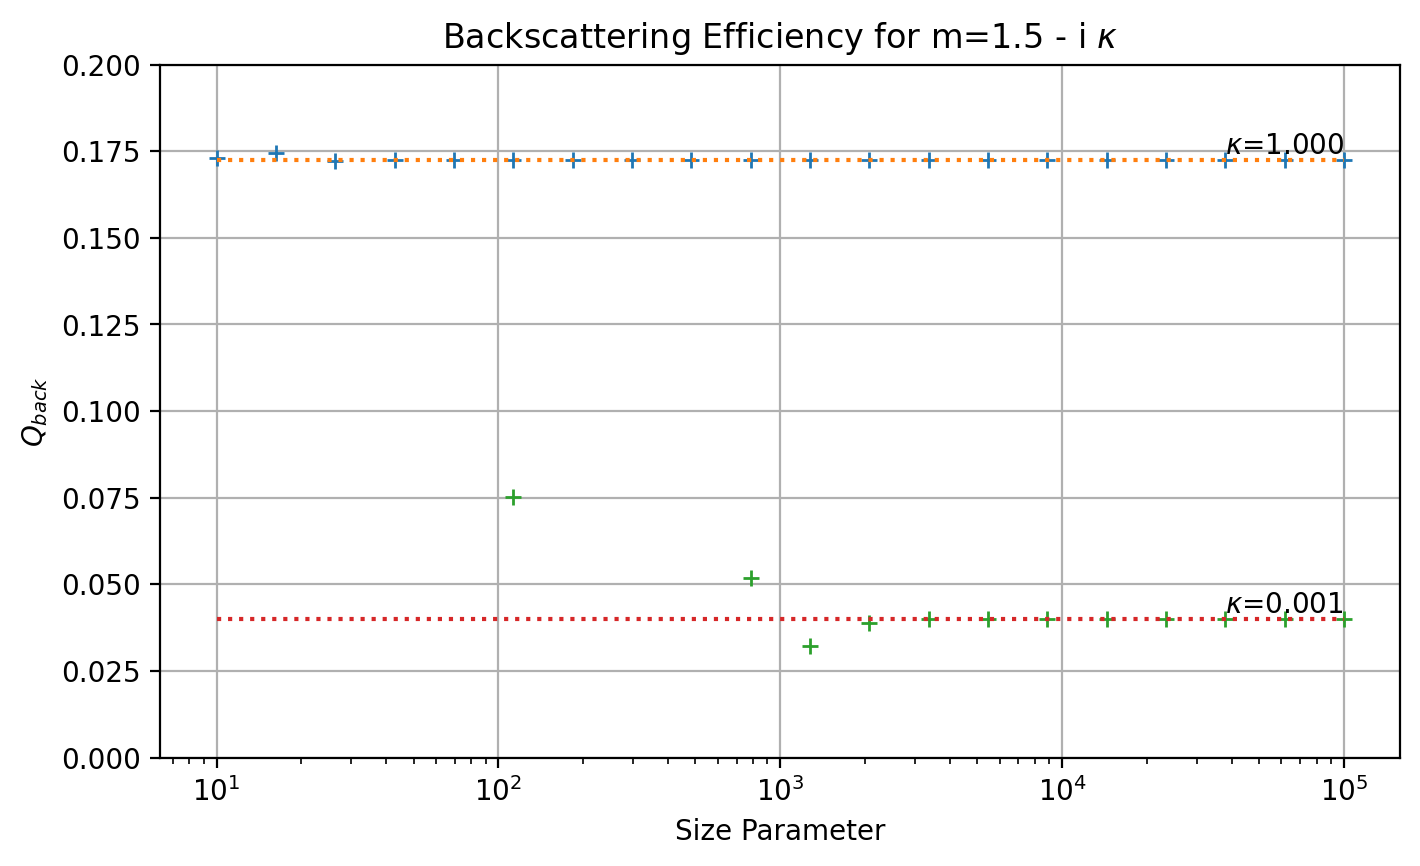

In [8]:
x = np.logspace(1, 5, 20)  # also in microns

kappa = 1
m = 1.5 - kappa * 1j
R = abs(m - 1) ** 2 / abs(m + 1) ** 2
Qbig = R * np.ones_like(x)

qext, qsca, qback, g = mie.efficiencies_mx(m, x)
plt.figure(figsize=(8, 4.5))
plt.semilogx(x, qback, "+")
plt.semilogx(x, Qbig, ":")
plt.text(x[-1], Qbig[-1], r"$\kappa$=%.3f" % kappa, va="bottom", ha="right")

kappa = 0.001
m = 1.5 - kappa * 1j
R = abs(m - 1) ** 2 / abs(m + 1) ** 2
Qbig = R * np.ones_like(x)

qext, qsca, qback, g = mie.efficiencies_mx(m, x)
plt.semilogx(x, qback, "+")
plt.semilogx(x, Qbig, ":")
plt.text(x[-1], Qbig[-1], r"$\kappa$=%.3f" % kappa, va="bottom", ha="right")

plt.ylim(0, 0.2)
plt.title(r"Backscattering Efficiency for m=1.5 - i $\kappa$")
plt.xlabel("Size Parameter")
plt.ylabel("$Q_{back}$")
plt.grid()